In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
plt.style.use('ggplot')

In [2]:
with open('./result.csv', 'r') as f:
    results = pd.read_csv(f)
results = results.sort_values(by=['m_id', 'prime'])

In [3]:
e_items = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'Valence', 'Arousal', 'like']
primes = ['none', 'bpm', 'chord', 'lyrics', 'playcount']

In [4]:
nones = results[results['prime'] == 'none']
bpms = results[results['prime'] == 'bpm']
chords = results[results['prime'] == 'chord']
lyrics = results[results['prime'] == 'lyrics']
playcounts = results[results['prime'] == 'playcount']

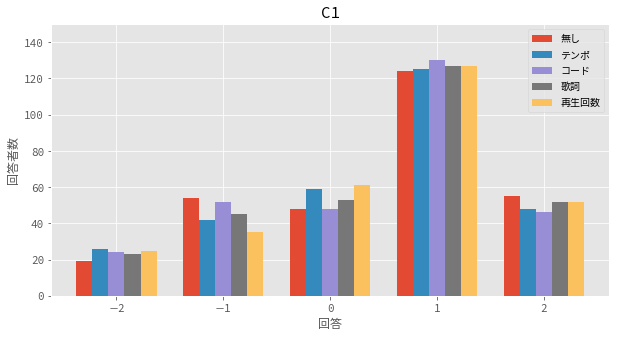

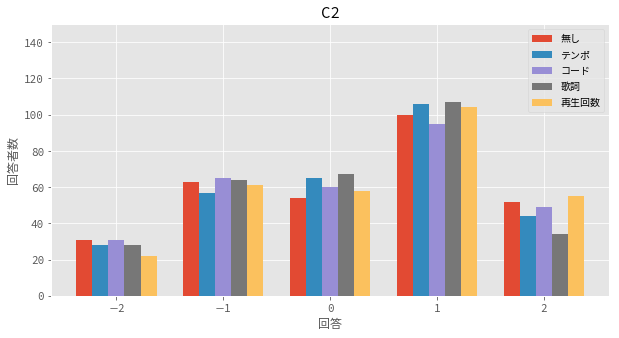

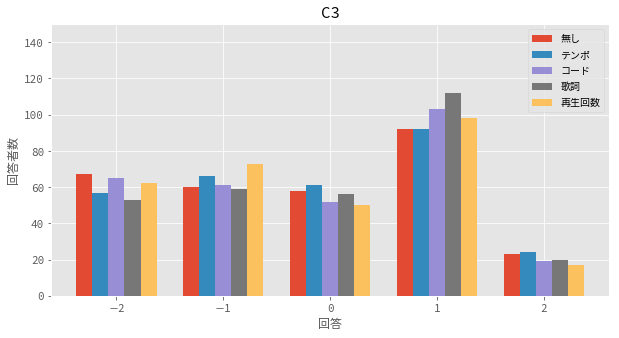

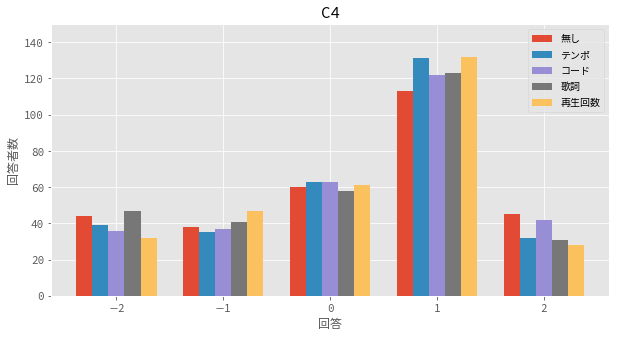

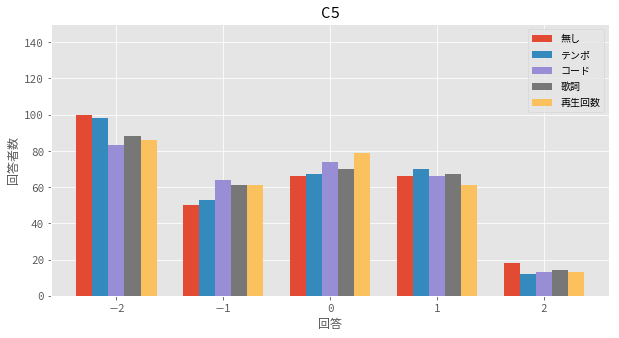

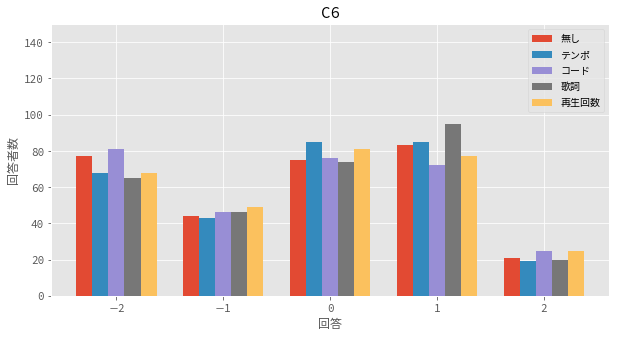

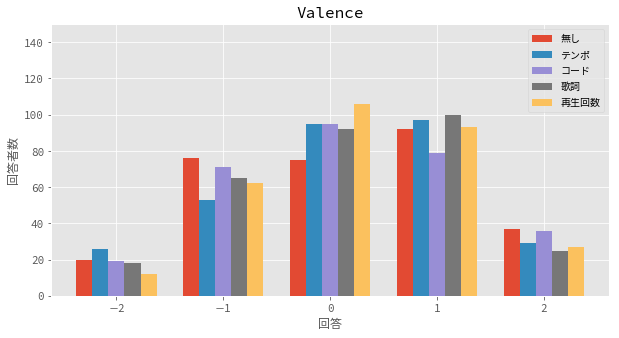

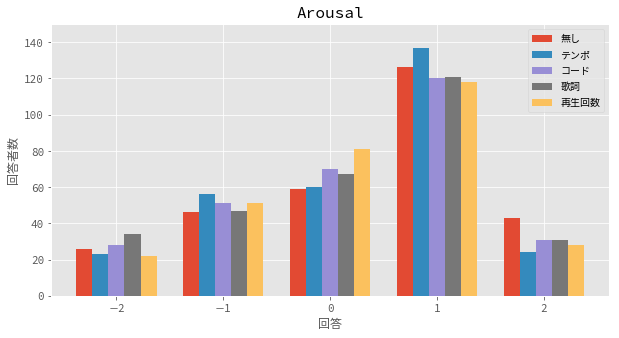

In [24]:
plt.clf()
# plt.subplots_adjust(wspace=0.4, hspace=0.6)
for i, e_item in enumerate(e_items[:-1]):
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111)
    w = 0.15

    y = nones.groupby(e_item).size()
    x = np.array(range(-2, 3, 1)) - (w * 2)
    ax.bar(x, y, width=w, label='無し')

    for (prime, label) in zip([bpms, chords, lyrics, playcounts], ['テンポ', 'コード', '歌詞', '再生回数']):
        y = prime.groupby(e_item).size()
        x = x + w
        ax.bar(x, y, width=w, label=label)
#     x = list(y.index)
#     ax.set_xticklabels(['-2', '-1', '0', '1', '2'])
    ax.set_title('%s' % e_item)
    ax.set_ylabel('回答者数')
    ax.set_xlabel('回答')
    ax.legend()
    ax.set_ylim([0, 150])
plt.show()

In [23]:
nones.mean()[e_items[:-1]]

C1         0.473333
C2         0.263333
C3        -0.186667
C4         0.256667
C5        -0.493333
C6        -0.243333
Valence    0.166667
Arousal    0.380000
dtype: float64